#### İmporting libraries and tools

In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
import numpy as np
import seaborn as sns

#### Reading Csv file of Data

In [12]:
df=pd.read_csv("..data//kindey stone urine analysis.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '..data//kindey stone urine analysis.csv'

<AxesSubplot:>

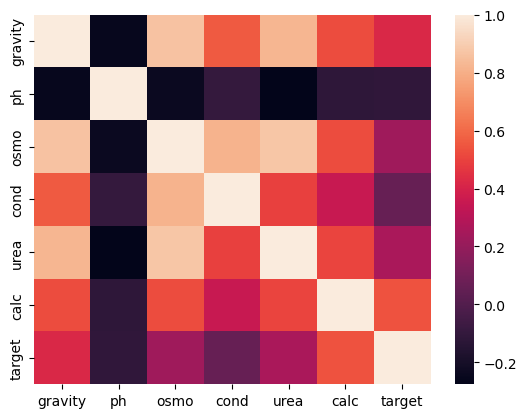

In [8]:
sns.heatmap(df.corr())

### Resampling and dodging underfit

In [66]:
cls_0=df[df['target']==0]
cls_1=df[df['target']==1]
df_class_1_over = cls_1.sample(250, replace=True)
df_class_0_over = cls_0.sample(250, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1_over], axis=0)
df_test_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 3 to 64
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  500 non-null    float64
 1   ph       500 non-null    float64
 2   osmo     500 non-null    int64  
 3   cond     500 non-null    float64
 4   urea     500 non-null    int64  
 5   calc     500 non-null    float64
 6   target   500 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 31.2 KB


In [67]:
y=df_test_over["target"]
X=df_test_over.drop("target",axis=1)

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,
                                               test_size=0.3,
                                                   random_state=42,
                                                  shuffle = True,
                                                  stratify = y)

In [ ]:
from xgboost import XGBClassifier
Classifier=XGBClassifier()
Classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
confusion_matrix(y_test,y_pred)

array([[75,  0],
       [ 0, 75]], dtype=int64)

### Saving model 

In [177]:
pickle.dump(Classifier,open("model.pkl","wb"))